In [2]:
#Import Library
! pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#import dependencies

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor
     

In [7]:
#open the dataset

df = pd.read_csv('AB_4A_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.96
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.00
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.52
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.12
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.60
413,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.60
414,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.60
415,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.83


In [8]:
#create the X and Y variable split

X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [10]:
#remove the low variance datasets
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(417, 168)

In [11]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 90%|█████████ | 38/42 [00:14<00:01,  3.87it/s]

[14:22:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:14<00:00,  2.91it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:12<00:00,  4.92it/s]

[14:22:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [00:12<00:00,  3.27it/s]


In [13]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.97,0.98,0.15,0.60
DecisionTreeRegressor,0.97,0.98,0.15,0.05
ExtraTreeRegressor,0.97,0.98,0.15,0.02
GaussianProcessRegressor,0.97,0.98,0.15,0.08
MLPRegressor,0.91,0.96,0.26,1.10
RandomForestRegressor,0.89,0.94,0.29,0.47
BaggingRegressor,0.86,0.93,0.32,0.10
LGBMRegressor,0.81,0.91,0.37,0.09
HistGradientBoostingRegressor,0.81,0.91,0.37,0.25


In [14]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,33154850479071833005822573046399141967250090134...,-3395376253880850515002553028202737798180381885...,25273246379110844549935661056.00,0.12
TransformedTargetRegressor,48955090173372917612544.00,-50134730900442147979264.00,307104670801.06,0.04
LinearRegression,48955090173372917612544.00,-50134730900442147979264.00,307104670801.06,0.06
RANSACRegressor,8485084781573745672192.00,-8689544655828534951936.00,127854373168.31,0.81
KernelRidge,19.09,-17.53,5.90,0.02
GaussianProcessRegressor,12.80,-11.08,4.77,0.03
QuantileRegressor,2.01,-0.03,1.39,1.53
Lasso,1.98,-0.00,1.37,0.02
LassoLars,1.98,-0.00,1.37,0.04


# **Data Visualization**

[(0.0, 1.0)]

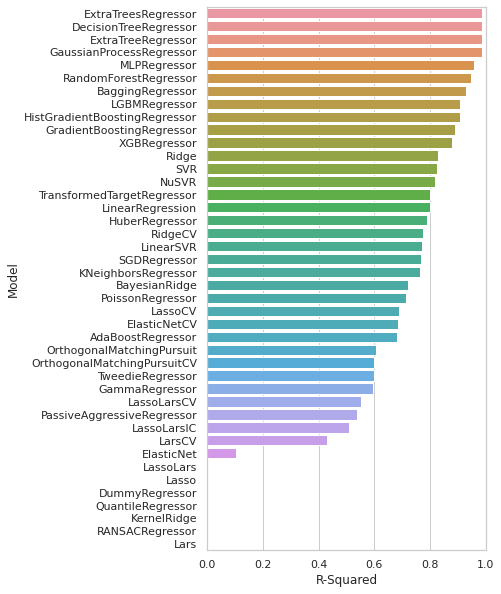

In [15]:

# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
     

[(0.0, 10.0)]

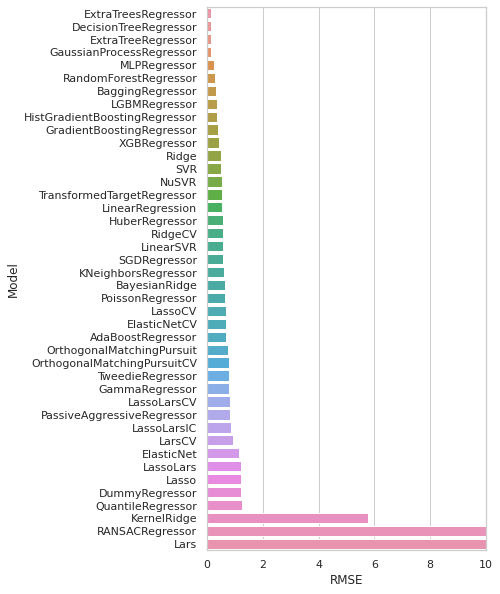

In [16]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

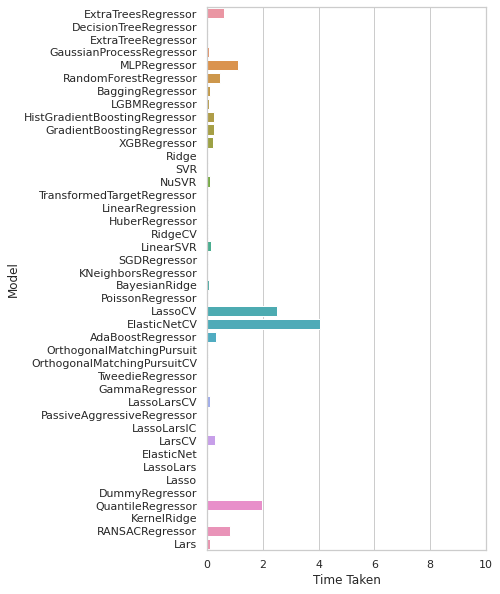

In [17]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))